## Semaine 5 : résolution de systèmes non linéaires et introduction à la différentiation automatique

In [1]:
using LinearAlgebra, Plots, Polynomials

### <font color='green'> Système non linéaire</font>

### <font color='orange'>[Exercice 1]</font> Newton-Raphson en dimension 2

On considère le système non linéaire suivant
$$
\left \{
    \begin{aligned}
        &y = (x-1)^2 \\
        &x^2 + y^2 = 4
    \end{aligned}
\right.
$$

1. Tracer des graphiques appropriés pour visualiser grossièrement la (les) zone(s) contenant une (des) solution(s)


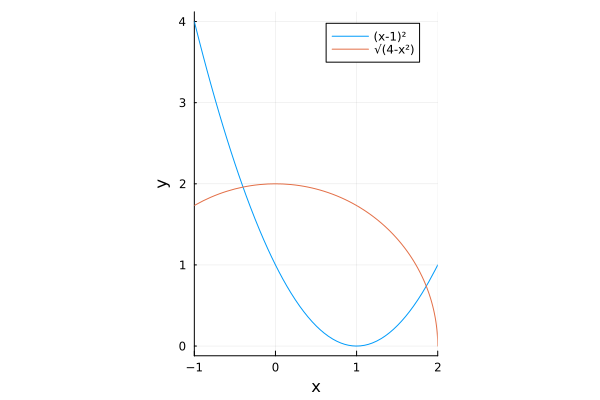

In [2]:
### BEGIN SOLUTION
plot(x->(x-1)^2, xlim=(-1,2), xlabel="x", ylabel="y", label="(x-1)²")
plot!(x->√(4-x^2), label="√(4-x²)", aspect_ratio=:equal)
### END SOLUTION

2. Implémenter un algorithme de Newton-Raphson pour calculer une approximation de cette (ces) solution(s) en prenant soin de retourner non seulement la solution mais également l'ensemble des itérations (pour éviter de se retrouver plus tard face au calcul d'un logarithme de 0, attention à ne pas inclure dans l'ensemble des itérations la dernière valeur censée être la meilleure approximation de la solution et qui doit être retournée indépendamment). L'algorithme devra être suffisamment générique pour traiter aussi bien des cas scalaires que vectoriels.

In [3]:
function newton_raphson(x, f, Jᶠ, maxiter = 100; ε = 1e-12)
    ### BEGIN SOLUTION
    lx = typeof(x)[]
    for i in 1:maxiter
        x -= Jᶠ(x)\f(x)
        norm(f(x)) < ε && return x, lx
        push!(lx, x)
    end
    ### END SOLUTION
    return "Failed to converge!"
end

newton_raphson (generic function with 2 methods)

In [4]:
x, lx = newton_raphson(1., x->x^2-4, x->2x, 100 ; ε = 1e-12)
@assert  x ≈ 2.
@assert  all(lx .≈ [2.5, 2.05, 2.000609756097561, 2.0000000929222947])

x, lx = newton_raphson([1.,1.], x->[x[1]^2-4, x[2]^2-9], x->2Diagonal(x), 100 ; ε = 1e-12)
@assert  all(x .≈ [2.0, 3.0])
@assert  all(lx .≈ [[2.5, 5.0], [2.05, 3.4], [2.000609756097561, 3.023529411764706], [2.0000000929222947, 3.00009155413138], [2.000000000000002, 3.000000001396984]])

3. Tracer l'évolution de l'erreur en fonction de l'itération pour la (les) solution(s) en utilisant une échelle appropriée en y. On pourra estimer qu'une solution donnée est fournie par la valeur finale de l'algorithme.

[-0.39986411042698694, 1.9596195276615394]
[1.8589441280924195, 0.7377850151844467]


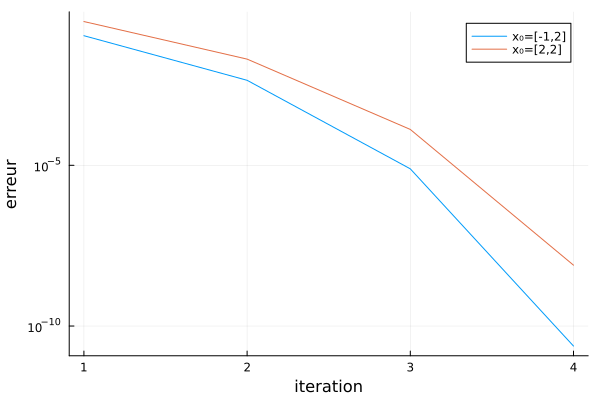

In [5]:
### BEGIN SOLUTION
f(X) = begin x, y = X ; [y-(x-1)^2, x^2+y^2-4] end
Jᶠ(X) = begin x, y = X ; [-2(x-1) 1 ; 2x 2y] end

x1, lx1 = newton_raphson([-1.,2.], f, Jᶠ) ; println(x1)
err1 = norm.([y-x1 for y in lx1])
plot(err1, yaxis=:log10, xlabel="iteration", ylabel="erreur", label="x₀=[-1,2]")
x2, lx2 = newton_raphson([2.,2.], f, Jᶠ) ; println(x2)
err2 = norm.([y-x2 for y in lx2])
plot!(err2, label="x₀=[2,2]")
### END SOLUTION

4. Estimer l'ordre de convergence i.e. $q$ tel que $\lim_{k\to\infty} \frac{\lVert \mathbf{x}_{k+1}-\mathbf{x}_*\rVert}{\lVert \mathbf{x}_{k}-\mathbf{x}_*\rVert^q} ∈ \mathbb{R}^*_+$ pour la (les) solution(s). On pourra pour cela utiliser le vecteur `logerr` des logarithmes des erreurs successives et construire le polynôme de degré 1 associant $\log{\lVert \mathbf{x}_{k}-\mathbf{x}_*\rVert }$ à $\log{\lVert \mathbf{x}_{k+1}-\mathbf{x}_*\rVert }$ en considérant les sous-vecteurs `logerr[1:end-1]` et `logerr[2:end]`.

In [6]:
### BEGIN SOLUTION
logerr1 = log10.(err1)
@show fit(logerr1[1:end-1], logerr1[2:end], 1)
logerr2 = log10.(err2)
@show fit(logerr2[1:end-1], logerr2[2:end], 1)
### END SOLUTION

fit(logerr1[1:end - 1], logerr1[2:end], 1) = Polynomial(-0.41763488292819584 + 1.9968058815394591*x)
fit(logerr2[1:end - 1], logerr2[2:end], 1) = Polynomial(-0.6705998699925872 + 1.9121170573245703*x)


Polynomial(-0.6705998699925872 + 1.9121170573245703*x)

--------------------
--------------------
--------------------

### <font color='green'> Introduction à la différentiation automatique</font>

### <font color='orange'>[Exercice 2]</font> Calcul de la racine carrée par la méthode babylonienne

Soit un paramètre réel $a>0$ et la suite définie par
<a id="baby"></a>
$$
\tag{1}
x_0>0 \qquad ; \qquad ∀k∈\mathbb{N},\quad x_{k+1}=\frac{1}{2}\left(x_k+\frac{a}{x_k}\right)
$$

  > *Questions préliminaires (à faire sur brouillon mais non demandées dans le rendu)*
  > 
  > i) En écrivant $x_{k+1}-\sqrt{a}$ en fonction de $x_k-\sqrt{a}$ puis $x_{k+1}-x_k$, montrer que $(x_k)$ converge quadratiquement vers $x_*=\sqrt{a}$ quel que soit $x_0>0$.
  > 
  >    <details>
  >        <summary>
  >            <em><font color='gray'>Aide (cliquer pour afficher)</font></em>
  >        </summary>
  > 
  >    - Noter déjà que si $x_0>0$ alors $x_k>0$ pour tout $k$.
  >    - Montrer que $x_{k+1}-\sqrt{a}=\frac{(x_k-\sqrt{a})^2}{2 x_k}$ et que $x_{k+1}-x_k=\frac{a-x_k^2}{2 x_k}$.
  >    - En déduire que $(x_k)_{k⩾1}$ est minorée par $\sqrt{a}$ et qu'elle est décroissante (attention à ne considérer le raisonnement que pour $k⩾1$) donc qu'elle converge.
  >    - Conclure sur la limite qui est nécessairement $\sqrt{a}$ et sur la convergence quadratique.
  >    </details>
  > 
  > ii) Montrer que la formulation par récurrence <a href="#baby">(1)</a> n'est autre que l'algorithme de Newton-Raphson appliqué à une fonction à identifier s'annulant en $x_*=\sqrt{a}$.

1. Construire une fonction `Babylonian` prenant comme arguments `a` ainsi qu'un entier `n` valant `10` par défaut et qui renvoie le vecteur $[x_0,x_1,\ldots,x_n]$ en initialisant la suite à $x_0=\frac{1+a}{2}$.

In [7]:
function Babylonian(a; n = 10)
    ### BEGIN SOLUTION
    x = [(1+a)/2]
    for i = 1:n push!(x, (x[end]+a/x[end])/2) end
    return x
    ### END SOLUTION
end

Babylonian (generic function with 1 method)

In [8]:
for a in (0.1, 2, 25, 100)
    @assert Babylonian(a)[end] ≈ √a
end

2. Tracer l'erreur $|x_k-x_*|$ en fonction du rang $k$ pour $a=2$.

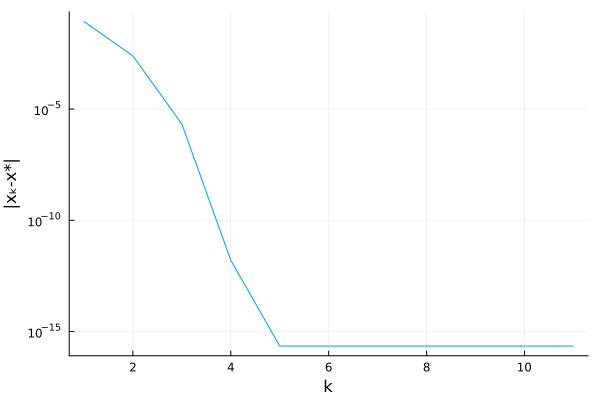

In [9]:
### BEGIN SOLUTION
plot(abs.(Babylonian(2) .- √2), yaxis=:log10, xlabel="k", ylabel="|xₖ-x*|", label="")
### END SOLUTION

   L'idée de la suite de l'exercice est d'appliquer la fonction `Babylonian` définie plus haut à un argument `a` non pas de type `Float64` mais d'un nouveau type permettant d'estimer à la fois la valeur de $\sqrt{a}$ mais également de la dérivée de $a\mapsto\sqrt{a}$ soit $\frac{1}{2\sqrt{a}}$. Pour cela, on introduit de nouveaux nombres qu'on appelle **nombres duaux**. Ceux-ci sont définis à l'instar des nombres complexes à partir de la définition d'un nombre particulier noté $\varepsilon$ de sorte qu'un nombre dual s'écrit $x=a+b\varepsilon$ avec $a$ et $b$ réels. En quelque sorte $\varepsilon$ joue un rôle analogue au $i$ complexe à la différence que l'on pose ici $\varepsilon^2=0$. L'objectif de tels nombres est d'être en mesure de stocker à la fois la valeur d'une fonction mais également sa dérivée en posant

   <a id="fdual"></a>
   $$
   \tag{2}
   f(a+b\varepsilon)=f(a)+f'(a)b\varepsilon
   $$

   ce qui entraîne que la dérivée en $a$ de $f$ peut être obtenue en récupérant la composante sur $\varepsilon$ de $f(a+\varepsilon)$ (i.e. en prenant $b=1$).

   En pratique, il est donc nécessaire de redéfinir le comportement des fonctions usuelles en cohérence avec <a href="#fdual">(2)</a>. Toutefois dans l'application actuelle, seules les opérations `+`, `-`, `*` et `/` seront nécessaires et donc devront être surchargées pour pouvoir prendre comme arguments des nombres duaux. En outre, il sera également nécessaire d'implémenter les fonctions `convert` pour convertir un réel en nombre dual et `promote_rule` pour exprimer le fait qu'en présence d'une opération impliquant deux nombres dont l'un est dual, les deux doivent d'abord être exprimés sous forme de nombres duaux avant de lancer l'opération. À noter que la surcharge des opérateurs et fonctions de base n'est possible que si ceux-ci sont explicitement importés à l'aide par exemple de `import Base: +, -, ...`. Il est également possible de définir la fonction `Base.show` de manière à ce que l'affichage d'un nombre dual ait explicitement la forme `a+bɛ`.

   La surcharge des opérateurs s'exprime mathématiquement par
   $$
   \begin{align*}
   (a+b\varepsilon)+(c+d\varepsilon)&=(a+c)+(b+d)\varepsilon\\
   (a+b\varepsilon)-(c+d\varepsilon)&=(a-c)+(b-d)\varepsilon\\
   (a+b\varepsilon)*(c+d\varepsilon)&=ac+(bc+ad)\varepsilon\\
   (a+b\varepsilon)/(c+d\varepsilon)&=\frac{a}{c}+\frac{bc-ad}{c^2}\varepsilon
   \end{align*}
   $$

   Alternativement à cette dernière opération, on peut aussi définir $\mathrm{inv}(a+b\varepsilon)=\frac{1}{a}-\frac{b}{a^2}\varepsilon$ puis `u/v=u*inv(v)`.

3. Étudier le `struct D` défini ci-dessous pour représenter un nombre dual ainsi que les lignes de code associées. Compléter les parties de code manquantes, à savoir les implémentations de `/` et `inv`.




In [10]:
import Base: +, -, *, /, inv, isapprox, convert, promote_rule
using LinearAlgebra

struct D <: Number
    f::Tuple{Float64, Float64}
end
D(a::Real, b::Real) = D((a, b))
+(x::D, y::D) = D(x.f .+ y.f)
-(x::D, y::D) = D(x.f .- y.f)
*(x::D, y::D) = D(x.f[1]*y.f[1], x.f[2]*y.f[1] + x.f[1]*y.f[2])
### BEGIN SOLUTION
/(x::D, y::D) = D(x.f[1]/y.f[1], (y.f[1]*x.f[2] - x.f[1]*y.f[2])/y.f[1]^2)
inv(x::D) = D(1/x.f[1], -x.f[2]/x.f[1]^2)
### END SOLUTION
-(x::D) = D(.-(x.f))
isapprox(x::D, y::D; kwargs...) = all(isapprox.(x.f, y.f ; kwargs...))
convert(::Type{D}, x::Real) = D((x,zero(x)))
promote_rule(::Type{D}, ::Type{<:Real}) = D
Base.show(io::IO,x::D) = print(io,x.f[1],x.f[2]<0 ? " - " : " + ",abs(x.f[2])," ε")

# Construction d'un nombre dual
x = D(0.1, -1.6)

0.1 - 1.6 ε

4. Définir une instance du nombre `ɛ` (\varepsilon puis touche TAB pour afficher ε), en d'autres termes le nombre `0+1ɛ` et effectuer quelques opérations pour vérifier les implémentations (utiliser la macro `@show` pour afficher un nombre dual), par exemple

   ```julia
   @show (1+2ɛ)*(3+4ɛ)
   @show 1/(1+ɛ)
   @show (1+2ɛ)/(2-ɛ)
   ```

In [27]:
### BEGIN SOLUTION
ε = D((0,1))
@show (1+2ɛ)*(3+4ɛ)
@show 1/(1+ɛ)
@show (1+2ɛ)/(2-ɛ)
### END SOLUTION

(1 + 2ε) * (3 + 4ε) = 3.0 + 10.0 ε
1 / (1 + ε) = 1.0 - 1.0 ε
(1 + 2ε) / (2 - ε) = 0.5 + 1.25 ε


0.5 + 1.25 ε

In [12]:
@assert (1+2ɛ)*(3+4ɛ) == 3+10ɛ "erreur"
@assert 1/(1+ɛ) == 1-ɛ "erreur"
@assert (1+2ɛ)/(2-ɛ) == 1/2+5ɛ/4 "erreur"

### BEGIN HIDDEN TESTS
a, b, c, d = rand(4)
@assert 1/(a+b*ɛ) == inv(a+b*ɛ) == 1/a-b/a^2*ε
@assert (a+b*ɛ)/(c+d*ɛ) == a/c + (b*c-a*d)/c^2*ε
### END HIDDEN TESTS

5. Exploiter la structure de nombre dual pour estimer la dérivée de la fonction racine à partir de la méthode babylonienne (en exploitant directement la fonction `Babylonian` sans la réécrire).

In [13]:
function derivative_sqrt(a; n = 10)
    ### BEGIN SOLUTION
    return Babylonian(a+ε)[end].f[2]
    ### END SOLUTION
end

derivative_sqrt (generic function with 1 method)

In [14]:
for a in (0.1, 2, 25, 100)
    @assert derivative_sqrt(a) ≈ 1/2√a
end

6. Superposer sur un graphe la dérivée de la racine obtenue par la méthode babylonienne sur nombre dual et l'expression analytique.

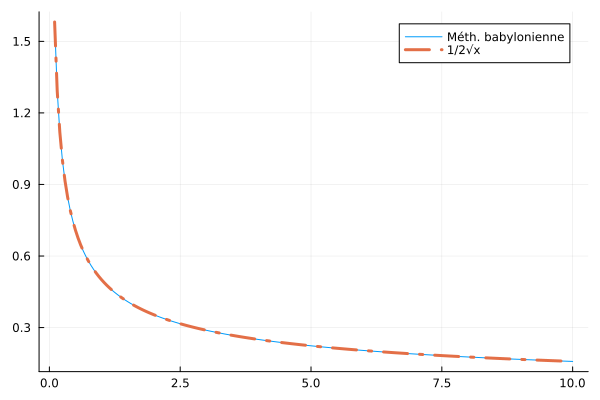

In [15]:
### BEGIN SOLUTION
xplot = LinRange(0.1,10,200)
plot(xplot, x -> Babylonian(x+ε)[end].f[2], label="Méth. babylonienne")
plot!(xplot, x -> 1/2√x, linestyle=:dashdot, linewidth=3, label="1/2√x")
### END SOLUTION

7. Proposer une méthode analogue pour calculer la racine $p^\textrm{ème}$ d'un nombre $a$ i.e. $\sqrt[p]{a}$. Vérifier que la dérivée de la racine $p^\textrm{ème}$ peut également être obtenue par exploitation des nombres duaux sans ligne de code supplémentaire.

In [16]:
function nthrt(a, p=2; x=1, n=100)
    ### BEGIN SOLUTION
    for i = 1:n x = ((p-1)*x+a/x^(p-1))/p end
    return x
    ### END SOLUTION
end

nthrt (generic function with 2 methods)

In [17]:
for a in (0.1, 2, 25, 100), p in (2, 3, 5)
    @assert nthrt(a+ε, p) ≈ a^(1/p) + a^(1/p-1)/p*ε  "erreur pour (a,p)=($a,$p)"
end

--------------------
--------------------
--------------------

### <font color='orange'>[Exercice 3]</font> Extension de la différentiation automatique au second ordre et à plusieurs variables : application à une méthode des moindres carrés non linéaire

L'objectif de cet exercice est d'étendre le concept de différentiation automatique au cas d'une fonction scalaire de plusieurs variables au second ordre, autrement dit de permettre le calcul du gradient et de la hessienne en $a$ de la fonction deux fois différentiable $f: Ω⊂\mathbb{R}^N → \mathbb{R}$.

En partant de son développement de Taylor à l'ordre 2

<a id="fvecdual"></a>
$$
\tag{3}
x₀, \varepsilon \in \mathbb{R}^N,\quad
f(x₀+\varepsilon)=f(x₀)+∇f(x₀)^T\varepsilon+\frac{1}{2}\varepsilon^T∇²f(x₀)\varepsilon+ℴ(\varepsilon²)
\quad\textrm{avec}\quad
f(x₀)∈\mathbb{R},\,∇f(x₀)∈\mathbb{R}^N,\,∇²f(x₀)∈\mathbb{R}^{N×N}
$$

on a l'idée d'introduire une nouvelle classe de nombres <u>scalaires</u> formés par un triplet constitué d'un scalaire $a$, d'un vecteur $b$ et d'une matrice carrée symétrique $c$ et d'écrire

<a id="vecdual"></a>
$$
\tag{4}
x=a+b^T\varepsilon+\frac{1}{2}\mathrm{Tr}(cη)
$$

où $\varepsilon$ et $η$ sont ici respectivement un vecteur de $\mathbb{R}^N$ et une matrice de $\mathbb{R}^{N×N}$ telles que $\varepsilon\varepsilon^T=η$, $η\varepsilon=0$ et $η²=0$. On peut ainsi faire l'économie de $η$ dans <a href="#vecdual">(4)</a> et réécrire tout nombre $x$ sous la forme

<a id="vecdual2"></a>
$$
\tag{5}
x=a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon
$$

Une telle famille de nombres est représentée ci-dessous par un `struct DD{N} <: Number` (où `N` permet de paramétriser ce nouveau type par la dimension $N$ et `<: Number` indique que le type dérive du type abstrait `Number` donnant un sens aux opérations usuelles) contenant les données membres `val`, `grad` et `hess` désignant respectivement $a$, $b$ et $c$ dans la décomposition <a href="#vecdual2">(5)</a>. A noter que 3 constructeurs sont définis pour ce type

- `DD(val, grad, hess)` définit un nombre `DD` à partir de ses 3 données membres `val`, `grad` et `hess`. Il n'est pas utile de préciser `N` car la dimension est déduite de `length(grad)`.

- `DD(val, grad)` définit un nombre `DD` à partir de `val` et `grad` et fixe `hess` à la matrice nulle de dimension cohérente avec celle de `grad`.

- `DD{N}(val)` définit un nombre `DD` à partir de `val` uniquement. Il est alors nécessaire de préciser dans la construction la valeur de `N` qui ne peut se déduire de `val`. `grad` et `hess` sont alors initialisés à des valeurs nulles de dimension cohérente avec `N`.


Il est naturel de surcharger les opérateurs de base de la façon suivante

$$
\begin{align*}
\left(a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon\right)+\left(a'+b'^T\varepsilon+\frac{1}{2}\varepsilon^Tc'\varepsilon\right)&=(a+a')+(b+b')^T\varepsilon+\frac{1}{2}\varepsilon^T(c+c')\varepsilon\\
\left(a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon\right)-\left(a'+b'^T\varepsilon+\frac{1}{2}\varepsilon^Tc'\varepsilon\right)&=(a-a')+(b-b')^T\varepsilon+\frac{1}{2}\varepsilon^T(c-c')\varepsilon\\
\left(a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon\right)*\left(a'+b'^T\varepsilon+\frac{1}{2}\varepsilon^Tc'\varepsilon\right)&=(aa')+(ab'+a'b)^T\varepsilon+\frac{1}{2}\varepsilon^T(ac'+a'c+bb'^T+b'b^T)\varepsilon
\end{align*}
$$

On choisit par ailleurs de construire l'opérateur de division à partir de la définition préalable de la function d'inversion `inv`. Compléter le code de la fonction `inv(x::DD{N}) where {N}`.



1. Établir à la main l'expression des données membres `val` et `grad` et fixe `hess` de l'inverse d'un nombre de type `DD{N}` par identification en écrivant que la mutiplication d'un nombre par son inverse correspond à `val=1`, `grad=0` et `hess=0`. Compléter la surcharge des opérateurs `-` et `*` ainsi que le code de la fonction `inv(x::DD{N}) where {N}`.
    
   Remarque : la syntaxe `where {N}` rappelle simplement que `N` est un paramètre qui sera remplacé à la compilation par la valeur voulue.

In [18]:
import Base: +, -, *, /, inv, conj, ==, convert, promote_rule

struct DD{N} <: Number
    val::Float64
    grad::Vector{Float64}
    hess::Symmetric{Float64, Matrix{Float64}}
    DD(val::Real, grad, hess) = new{length(grad)}(val, grad, Symmetric(hess))
    DD(val::Real, grad) = new{length(grad)}(val, grad, Symmetric(zeros(length(grad),length(grad))))
    DD{N}(val::Real) where {N} = new{N}(val, zeros(N), Symmetric(zeros(N,N)))
end
val(x::DD{N}) where {N} = x.val
grad(x::DD{N}) where {N} = x.grad
hess(x::DD{N}) where {N} = x.hess
conj(x::DD{N}) where {N} = DD(conj(x.val),conj(x.grad),conj(x.hess))
+(x::DD{N}, y::DD{N}) where {N} = DD(x.val+y.val,x.grad+y.grad,x.hess+y.hess)
### BEGIN SOLUTION
-(x::DD{N}, y::DD{N}) where {N} = DD(x.val-y.val,x.grad-y.grad,x.hess-y.hess)
*(x::DD{N}, y::DD{N}) where {N} = DD(x.val*y.val,
                                  x.val*y.grad+y.val*x.grad,
                                  x.val*y.hess+y.val*x.hess+x.grad*y.grad'+y.grad*x.grad')
inv(x::DD{N}) where {N} = (x⁻¹ = inv(x.val) ; x⁻² = x⁻¹^2 ; x⁻³ = x⁻¹^3 ; DD(x⁻¹, -x⁻²*x.grad, x⁻³*(2x.grad*x.grad'-x.val*x.hess)))
### END SOLUTION
/(x::DD{N}, y::DD{N}) where {N} = x*inv(y)
==(x::DD{N}, y::DD{N}) where {N} = x.val == y.val && x.grad == y.grad && x.hess == y.hess
convert(::Type{DD{N}}, x::Real) where {N} = DD{N}(x)
promote_rule(::Type{DD{N}}, ::Type{<:Real}) where {N} = DD{N}
Base.show(io::IO,x::DD{N}) where {N} = print(io,x.val," + ",x.grad,"^T𝛆"," + ½ 𝛆^T",x.hess,"𝛆")

En dimension $N=2$, on peut introduire les deux nombres

   ```julia
   εˣ = DD(0,[1,0])
   εʸ = DD(0,[0,1])
   ```

Pour bien comprendre le fonctionnement de ces nombres, il peut être utile de vérifier à la main les calculs de `1+εˣ`, `1+εˣ+εʸ`, `(1+εˣ)*(2+3εʸ)` et `εˣ/(1+εˣ+εʸ)` contrôlés par les `@assert` ci-dessous. Par exemple

$$
ε^x ε^y=\frac{1}{2} \begin{pmatrix}ε^x \\ ε^y\end{pmatrix}^T \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}ε^x \\ ε^y\end{pmatrix}
⟹
\left(0, \begin{pmatrix}1 \\ 0\end{pmatrix}, \begin{pmatrix}0 & 0 \\ 0 & 0\end{pmatrix}\right)
*
\left(0, \begin{pmatrix}0 \\ 1\end{pmatrix}, \begin{pmatrix}0 & 0 \\ 0 & 0\end{pmatrix}\right)
=
\left(0, \begin{pmatrix}0 \\ 0\end{pmatrix}, \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\right)
$$

In [19]:
εˣ = DD(0,[1,0])
εʸ = DD(0,[0,1])
@assert 1+εˣ == DD(1, [1, 0], zeros(2,2))
@assert εˣ*εʸ == DD(0, [0, 0], [0  1; 1  0])
@assert 1+2εˣ-3εʸ == DD(1, [2, -3], zeros(2,2))
@assert (1+εˣ)*(2+3εʸ) == DD(2, [2, 3], [0  3; 3  0])
@assert εˣ/(1+εˣ+εʸ) == DD(0, [1, 0], [-2 -1; -1  0])
;

2. Obtenir le gradient `gradf` et la hessienne `hessf` de $f(x,y)=\frac{(x+2y)^2}{2}$ par différentiation automatique au point $(x_0,y_0)=(3,1)$. On pourra pour cela exploiter `f(x₀+εˣ, y₀+εʸ)`.

In [20]:
### BEGIN SOLUTION
f(x,y) = (x+2y)^2/2
dualf = f(3+εˣ,1+εʸ)
gradf, hessf = grad(dualf), hess(dualf)
### END SOLUTION

([5.0, 10.0], [1.0 2.0; 2.0 4.0])

In [21]:
@assert gradf == [5, 10]
@assert hessf == [1 2; 2 4]

3. Ecrire une fonction `opdiff` qui prend en argument une fonction scalaire `f` dépendant de plusieurs variables ainsi qu'un vecteur `x` et qui retourne le triplet `f(x), ∇f(x), ∇²f(x)`. Attention on suppose que la signature de `f` dépend explicitement de plusieurs variables scalaires `f(x₁, x₂, ..., xₙ)` plutôt que d'une variable vectorielle étant entendu que l'application sur un vecteur peut être réalisé grâce à l'opérateur "splat" `f(x...)`.

    <details>
        <summary>
            <em><font color='gray'>Aide (cliquer pour afficher)</font></em>
        </summary>
    
    - Se convaincre à partir de la question précédente que le calcul demandé résulte de celui de `f(x₁+ɛ₁, x₂+ɛ₂, ..., xₙ+ɛₙ)` où les `ɛᵢ` sont les composantes de la partie `grad` d'un nombre de type `DD` défini par 
        ```julia
        ε = [DD(0,(1:n .== i)) for i in 1:n]
        ```

    - Visualiser ce que donne `ε` quand `n` vaut 3 par exemple.
    </details>


In [22]:
function opdiff(f, x)
    ### BEGIN SOLUTION
    N = length(x)
    dualx = x + [DD(0,(1:N .== i)) for i in 1:N]
    dualf = f(dualx...)
    return val(dualf), grad(dualf), hess(dualf)
    ### END SOLUTION
end

opdiff (generic function with 1 method)

In [23]:
@assert all(opdiff((x,y)->(x+2y)^2/2, [3,1]) == (12.5, [5, 10], [1 2; 2 4]))

function test_diff(n)
    a, b, c, X = rand(), rand(n), Symmetric(rand(n,n)), rand(n)
    f(X...) = begin let a=a, b=b, c=c end ; V=collect(X) ; return a + b'*V + 1/2 * V'*c*V end
    v, g, h = opdiff(f, X)
    return all((v ≈ f(X...), g ≈ b + c*X, h ≈ c))
end

for n in (1, 10, 20)
    @assert test_diff(n) "erreur pour n=$n"
end

4. On souhaite maintenant réaliser un programme permettant de minimiser une fonction $J$ arbitraire dépendant de plusieurs variables

   $$
   \min_{(p_1,\ldots,p_n)\in\mathbb{R}^n} J(p_1,\ldots,p_n)
   $$

   On suppose que le problème revient à chercher un vecteur de paramètres annulant son gradient par la méthode de Newton-Raphson. Autrement dit à chaque étape il est nécessaire d'évaluer le gradient ainsi que la hessienne de $J$
   
   $$
   p^{k+1}=p^{k}-∇²J(p^{k})^{-1}∇J(p^{k})
   $$
   
   Écrire une fonction générique `minimizer` prenant comme entrées une fonction `J`, un vecteur de paramètres initiaux `p`, un nombre maximal d'itérations `maxiter` (par défaut `100`)  et un paramètre d'arrêt `ϵ` (par défaut `1.e-15`). On considérera un algorithme de Newton-Raphson dans lequel les opérateurs différentiels sont calculés par différentiation automatique et on prendra un critère d'arrêt $\lVert ∇J(p^{k})\rVert<ϵ$. Il pourra être judicieux à des fins de débogage d'introduire un argument supplémentaire booléen appelé `verbose` qui, s'il est égal à `true`, implique l'affichage de valeurs intermédiaires du code (les informations à afficher sont naturellement à coder dans `minimizer` dans une séquence de type `if verbose println(...) end`).

In [24]:
function minimizer(J::Function, p, maxiter = 100; ϵ = 1.e-15, verbose = true)
    ### BEGIN SOLUTION
    n = length(p)
    iter = 0
    for i in 1:maxiter
        _, g, h = opdiff(J, p)
        p -= h\g
        iter += 1
        if verbose println("Iter $(iter) ; p=$(p) ; gradJ=$(g)") end
        norm(g) < ϵ && return p
    end
    ### END SOLUTION
    return "Failed to converge!"
end

minimizer (generic function with 2 methods)

5. Application n°1.

   On dispose de $n$ points $(x_i, y_i)$ d'une fonction inconnue $y = f(x)$.
   
   ```julia
   x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
   y = [0.6761488864859304; 0.6345697680852508; 0.6396283580587062; 0.6132010027973919;
      0.5906142598705267; 0.5718728461471725; 0.5524549902830562; 0.538938885654085;
      0.5373495476994958; 0.514904589752926; 0.49243437874655027]
   ```
   
   On souhaite approximer $f$ par une fonction de la forme

   $$
   \widetilde f(x) = \frac{a}{b + x}
   $$
   en minimisant
   $$
   \sum_{i=1}^{n} |\widetilde f(x_i) - y_i|^2
   $$

   Écrire un code formant la fonction à minimiser et appliquer `minimizer` pour obtenir la meilleure approximation $\widetilde f$. Tracer sur le même graphe les points donnés et la fonction approximante.

Iter 1 ; p=[0.350047275534061, 0.5137548929772087] ; gradJ=[2.201267606142057, -1.8777320453861037]
Iter 2 ; p=[0.49137914987434056, 0.5445008323365691] ; gradJ=[-3.9343634064126656, 1.3692731672981502]
Iter 3 ; p=[0.6778233306255093, 0.8027374567015065] ; gradJ=[-0.30476451750426087, -0.44529695032544503]
Iter 4 ; p=[0.8876978956611383, 1.122727125296048] ; gradJ=[0.0029325771558549873, -0.26743830179702943]
Iter 5 ; p=[1.1238443337438482, 1.50390161481891] ; gradJ=[0.051621549277688236, -0.14006026724256454]
Iter 6 ; p=[1.3798518105662807, 1.9301752535231915] ; gradJ=[0.03899804538043408, -0.06654431083137657]
Iter 7 ; p=[1.6309589293718458, 2.3552367203818845] ; gradJ=[0.021219176630635182, -0.0288480335907029]
Iter 8 ; p=[1.8293305573546037, 2.6939769498958834] ; gradJ=[0.009310630818782119, -0.01099209925161436]
Iter 9 ; p=[1.928372800586006, 2.8638916906780625] ; gradJ=[0.0030150633112978045, -0.003231456898782631]
Iter 10 ; p=[1.9476487198372296, 2.897044423690885] ; gradJ=[0.00

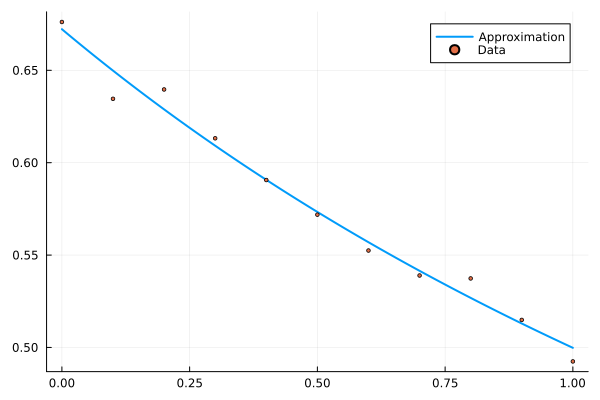

In [25]:
x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
y = [0.6761488864859304; 0.6345697680852508; 0.6396283580587062; 0.6132010027973919;
     0.5906142598705267; 0.5718728461471725; 0.5524549902830562; 0.538938885654085;
     0.5373495476994958; 0.514904589752926; 0.49243437874655027]
### BEGIN SOLUTION
f(a,b) = x -> a / (b+x)
J(a,b) = sum((f(a,b).(x) .- y).^2)
p = minimizer(J, [1,1])
xplot = LinRange(extrema(x)...,200)
Plots.plot(xplot, f(p...), label="Approximation", linewidth=2)
Plots.scatter!(x, y, markersize=2, label="Data")
### END SOLUTION

6. Application n°2.

   On se donne $n$ nouveaux points $(x_i, y_i)$ d'une fonction inconnue $y = f(x)$
   
    ```julia
   x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
   y = [-0.9187980789440975; -0.6159791344678258; -0.25568734869121856;
      -0.14269370171581808; 0.3094396057228459; 0.6318327173549161;
      0.8370437988106428; 1.0970402798788812; 1.6057799131867696;
      1.869090784869698; 2.075369730726694]
   ```  
   
   et on souhaite approximer $f$ par une fonction affine

   $$
   \widetilde f(x) = ax+b
   $$

   en minimisant la somme des distances euclidiennes entre les points et la droite définie par $\widetilde f$. Etant donné que la distance entre un point $(x_i,y_i)$ et la ligne droite est donnée par

   $$
   \frac{\lvert y_i - a x_i - b \rvert}{\sqrt{1+a^2}}
   $$

   la fonction objectif à minimiser s'écrit

   $$
   J(a, b) := \sum_{i=1}^{n} \frac{ \left( y_i - a x_i - b \right)^2 }{1+a^2}
   $$

   Trouver les paramètres optimaux $a$ et $b$ à l'aide de `minimizer` et tracer la droite ainsi que les points.

Iter 1 ; p=[1.0075555434380665, 0.09331778572184546] ; gradJ=[-4.126387371653923, 10.007561433268513]
Iter 2 ; p=[1.582967866897024, -0.19730704835843071] ; gradJ=[-4.4809594275921665, 0.07504342925521845]
Iter 3 ; p=[2.0932414662616434, -0.45457646030837634] ; gradJ=[-1.5251348351481098, 0.024820199252327355]
Iter 4 ; p=[2.552507163981802, -0.6853807383742772] ; gradJ=[-0.5373702030282352, 0.007450650886929703]
Iter 5 ; p=[2.887732653452152, -0.8534963621250207] ; gradJ=[-0.17228722774104155, 0.0019061700510825434]
Iter 6 ; p=[3.0360521221804633, -0.9277907726161118] ; gradJ=[-0.04228469642374015, 0.0003492973340746254]
Iter 7 ; p=[3.0591728178404582, -0.9393645341617476] ; gradJ=[-0.005080598894956569, 2.928403949506539e-5]
Iter 8 ; p=[3.0596590334740172, -0.9396078287986602] ; gradJ=[-0.00010265416035439836, 3.96892253319013e-7]
Iter 9 ; p=[3.0596592430153318, -0.9396079336229851] ; gradJ=[-4.423060325116357e-8, 1.1394944080523826e-10]
Iter 10 ; p=[3.059659243015371, -0.939607933623

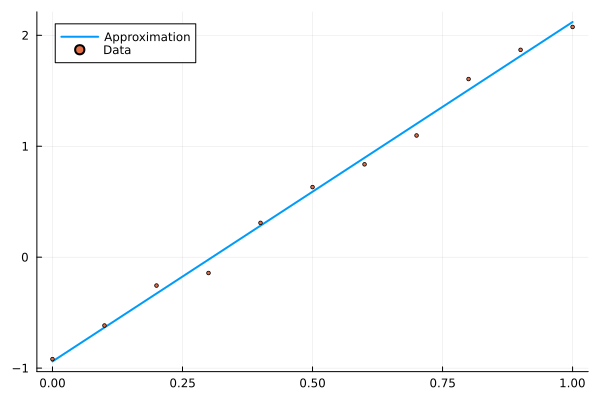

In [26]:
x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
y = [-0.9187980789440975; -0.6159791344678258; -0.25568734869121856;
     -0.14269370171581808; 0.3094396057228459; 0.6318327173549161;
     0.8370437988106428; 1.0970402798788812; 1.6057799131867696;
     1.869090784869698; 2.075369730726694]
### BEGIN SOLUTION
f(a,b) = x -> a*x+b
J(a,b) = sum((f(a,b).(x) .- y).^2)/(1+a^2)
p = minimizer(J, [1,1])
xplot = LinRange(extrema(x)...,200)
Plots.plot(xplot, f(p...), label="Approximation", linewidth=2)
Plots.scatter!(x, y, markersize=2, label="Data")
### END SOLUTION